In [1]:
%pip install seaborn
%pip install folium

In [3]:
%pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium



I will create plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>


---


In [4]:
# importing data
import pandas as pd
df = pd.read_csv('historical_automobile_sales.csv')
df.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Creating a *Line chart* to show how automobile sales fluctuate from year to year


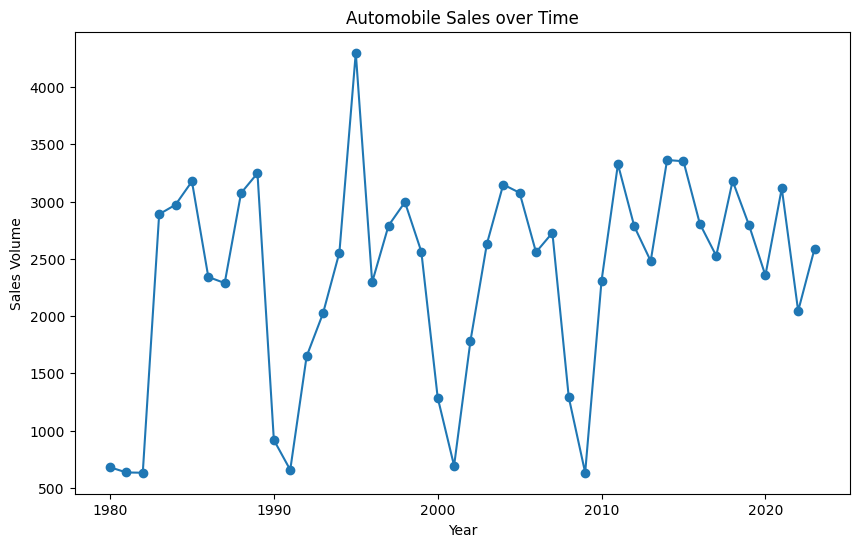

In [10]:

df['Date'] = pd.to_datetime(df['Date'])

yearly_sales = df.groupby(df['Date'].dt.year)['Automobile_Sales'].mean()

yearly_sales.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')

plt.show()

                                                        Image 1

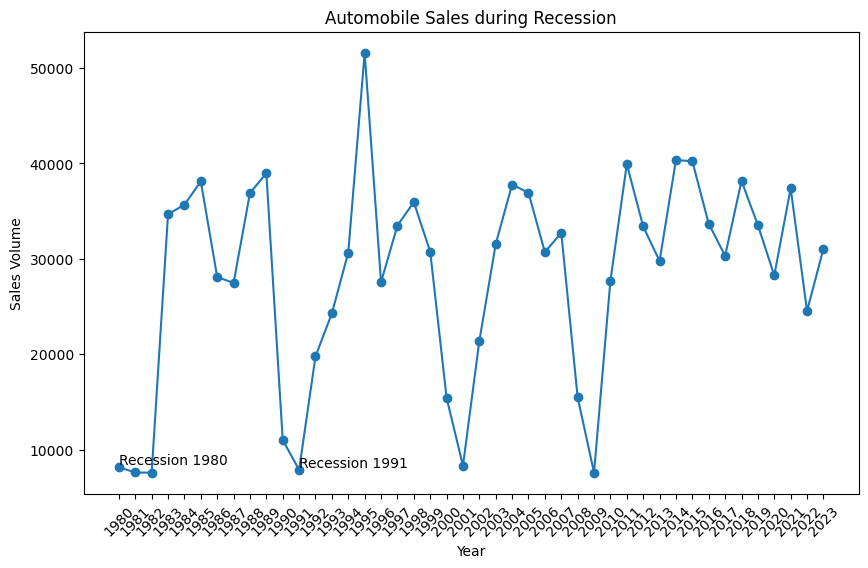

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

yearly_sales = df.groupby(df['Date'].dt.year)['Automobile_Sales'].sum()

ax = yearly_sales.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')

recession_years = [1980, 1991]  

plt.xticks(yearly_sales.index, rotation=45)

for year in recession_years:
    if year in yearly_sales.index:
        plt.text(year, yearly_sales[year], f'Recession {year}', verticalalignment='bottom')

plt.show()

                                                        Image 2

---



Plotting different lines for categories of vehicle type and analysing the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


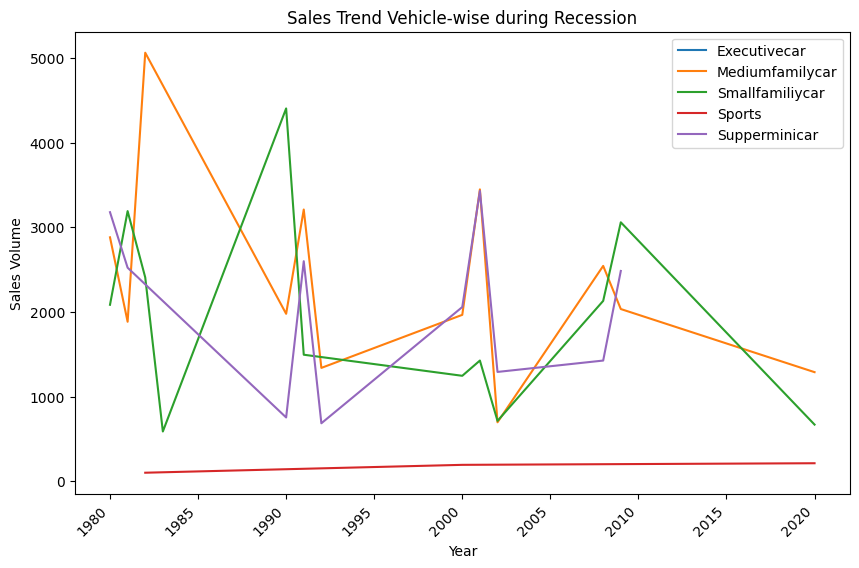

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

recession_df = df[df['Recession'] == 1]

df_Mline = recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()

df_Mline.set_index('Year', inplace=True)

df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()

plt.xticks(rotation=45, ha='right')

plt.show()


                                                        Image 3

From this plot, we can understand that during the recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the supermin icar and smal family ycar increased.

----


Comparing the sales trend per vehicle type for a recession period with a non-recession period.


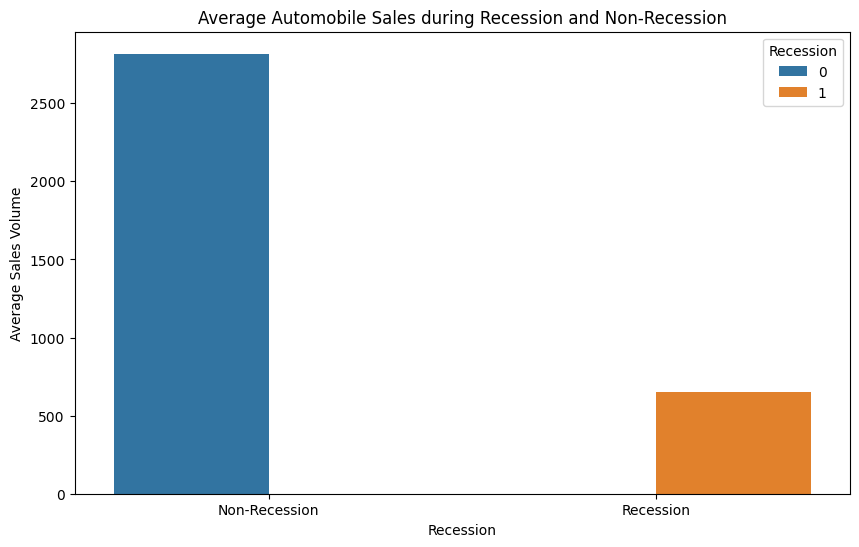

In [19]:

df['Date'] = pd.to_datetime(df['Date'])

new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession')
plt.ylabel('Average Sales Volume')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


                                                        Image 4

Comparing the sales of different vehicle types during a recession and a non-recession period



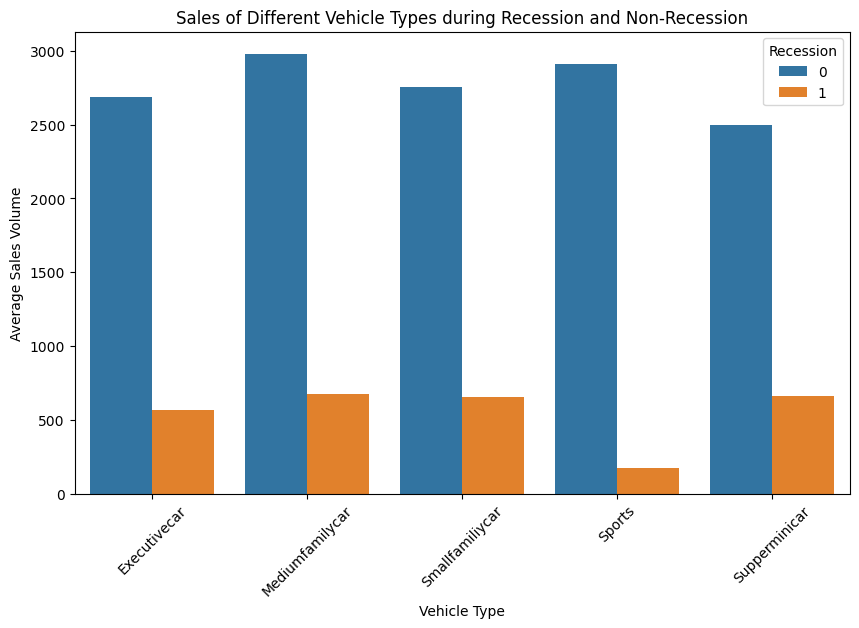

In [21]:

df['Date'] = pd.to_datetime(df['Date'])

sales_by_recession_vehicle = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=sales_by_recession_vehicle)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Sales Volume')
plt.title('Sales of Different Vehicle Types during Recession and Non-Recession')
plt.xticks(rotation=45)  
plt.legend(title='Recession', loc='upper right')
plt.show()



                                                        Image 5

We can see a huge decline in sales during recession period and the most affected cars were executive cars and sports cars.

---


<br>Plotting a two line charts using sub plotting to see how the GDP varied over time during recession and non-recession periods. 


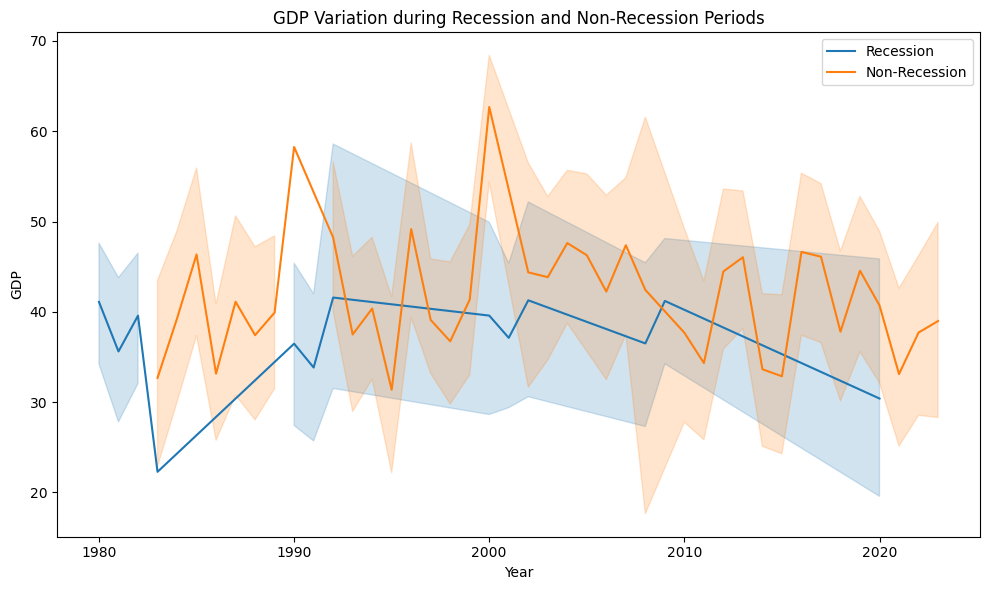

In [25]:

df['Date'] = pd.to_datetime(df['Date'])

#Creating dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession and Non-Recession Periods')
plt.legend()

plt.tight_layout()
plt.show()


                                                        Image 6

From this plot, it is evident that during the recession, the GDP of the country was in a low range, which might have affected the overall sales of the company<br><br>

Developing a Bubble plot to display the impact of seasonality on Automobile Sales and to see how seasonality has impacted the sales, and in which months the sales were high or low.



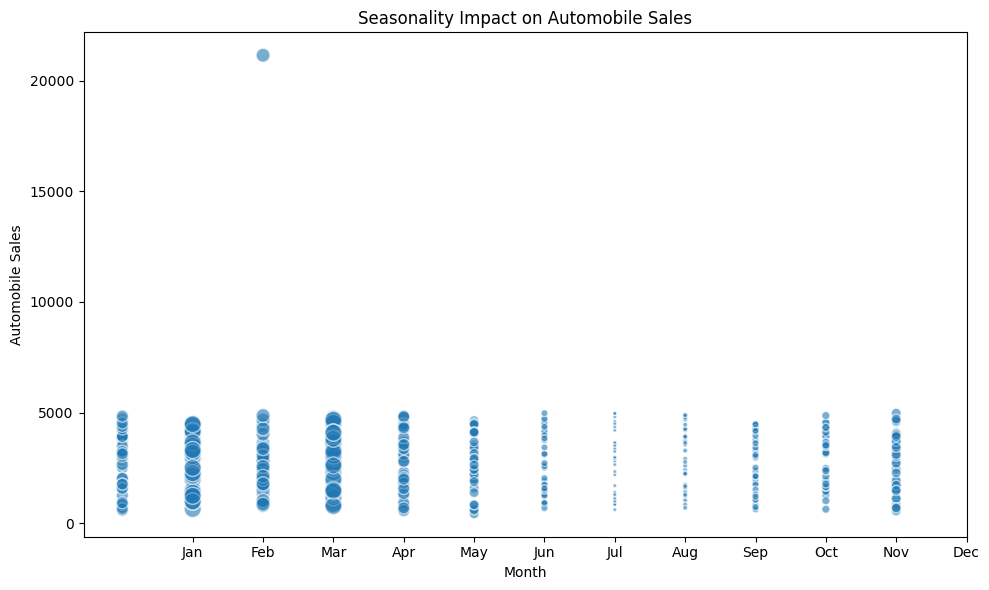

In [26]:

df['Date'] = pd.to_datetime(df['Date'])

non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(x=non_rec_data['Month'], y=non_rec_data['Automobile_Sales'],
            s=non_rec_data['Seasonality_Weight'] * 100, alpha=0.6, edgecolors='w')

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


                                                        Image 7


From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>



---



Developing a scatter plot to identify if there is a correlation between consumer confidence and automobile sales during the recession period. 


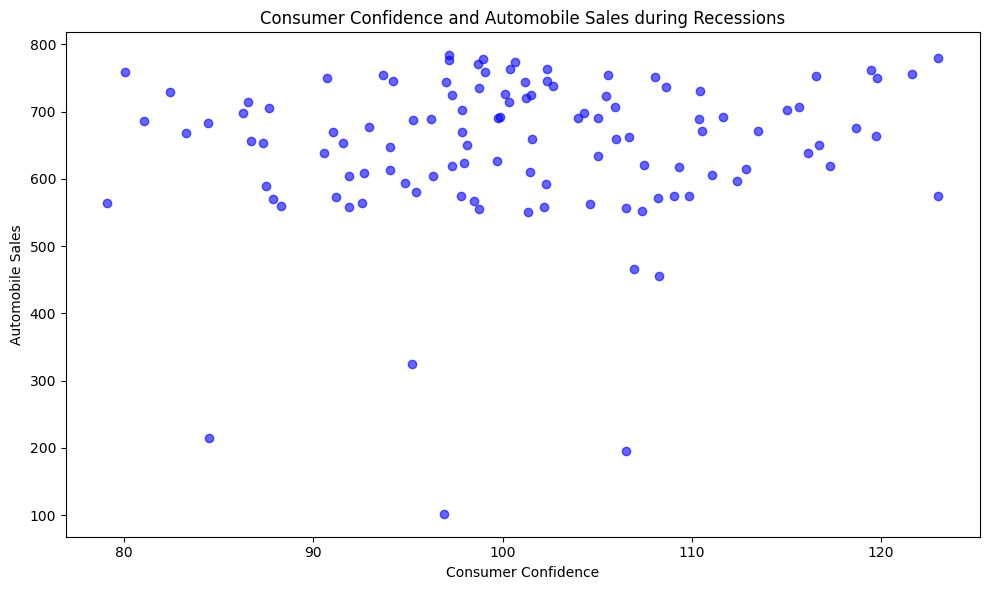

In [27]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Create scatter plot for correlation between consumer confidence and automobile sales
plt.figure(figsize=(10, 6))
plt.scatter(x=recession_data['Consumer_Confidence'], y=recession_data['Automobile_Sales'],
            color='blue', alpha=0.6)

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.tight_layout()
plt.show()


                                                        Image 8


Plotting another scatter plot to see how the average vehicle price relates to the sales volume during recessions.


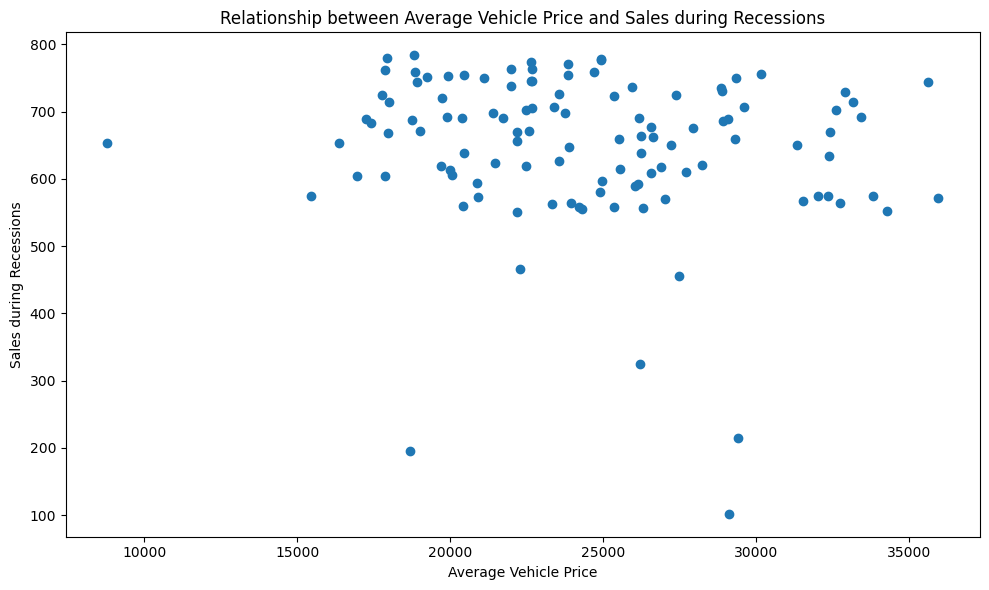

In [28]:

df['Date'] = pd.to_datetime(df['Date'])

recession_data = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales during Recessions')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.tight_layout()
plt.show()


                                                        Image 9


There is not much relation here!<br><br>


----


Creating a pie chart to see how the advertising expenditure of XYZAutomotives changed during the recession and non-recession periods. 


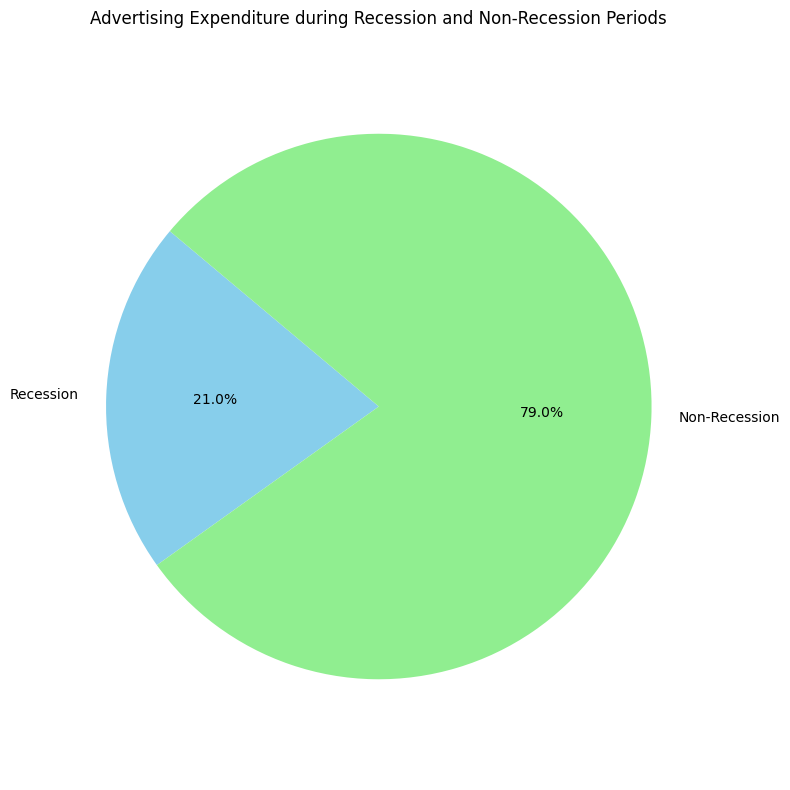

In [29]:

df['Date'] = pd.to_datetime(df['Date'])

# Create dataframes for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Calculate the sum of Advertising_Expenditure for both dataframes
total_ad_exp_rec = recession_data['Advertising_Expenditure'].sum()
total_ad_exp_non_rec = non_rec_data['Advertising_Expenditure'].sum()

# Data for pie chart
total_values = [total_ad_exp_rec, total_ad_exp_non_rec]
labels = ['Recession', 'Non-Recession']

# Create pie chart for advertising expenditure during recession and non-recession periods
plt.figure(figsize=(8, 8))
plt.pie(total_values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


                                                        Image 10

It seems the company has been spending much more on advertisements during non-recession periods as compared to during recession times.

---


 
Creating another pie plot to display the total advertisement expenditure for each vehicle type


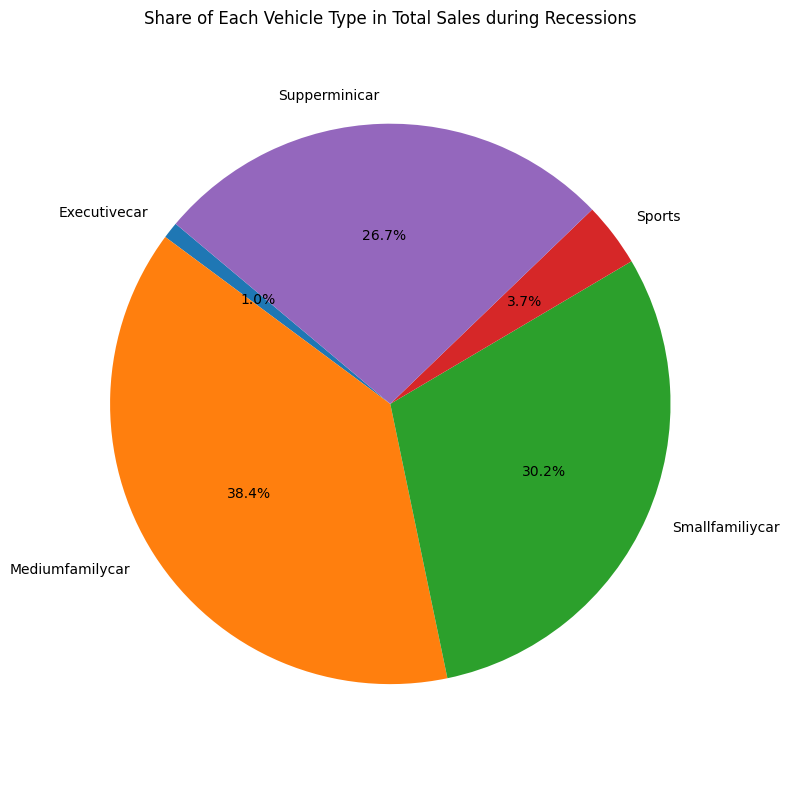

In [30]:

df['Date'] = pd.to_datetime(df['Date'])

recession_data = df[df['Recession'] == 1]

vehicle_ad_exp_sum = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 8))
plt.pie(vehicle_ad_exp_sum, labels=vehicle_ad_exp_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.axis('equal') 

plt.tight_layout()
plt.show()


                                                        Image 11

We can see that during the recession the advertisements were mostly focused on low price range vehicles.



----



Analyzing the effect of the unemployment rate on vehicle type and sales during the Recession Period by creating a countplot



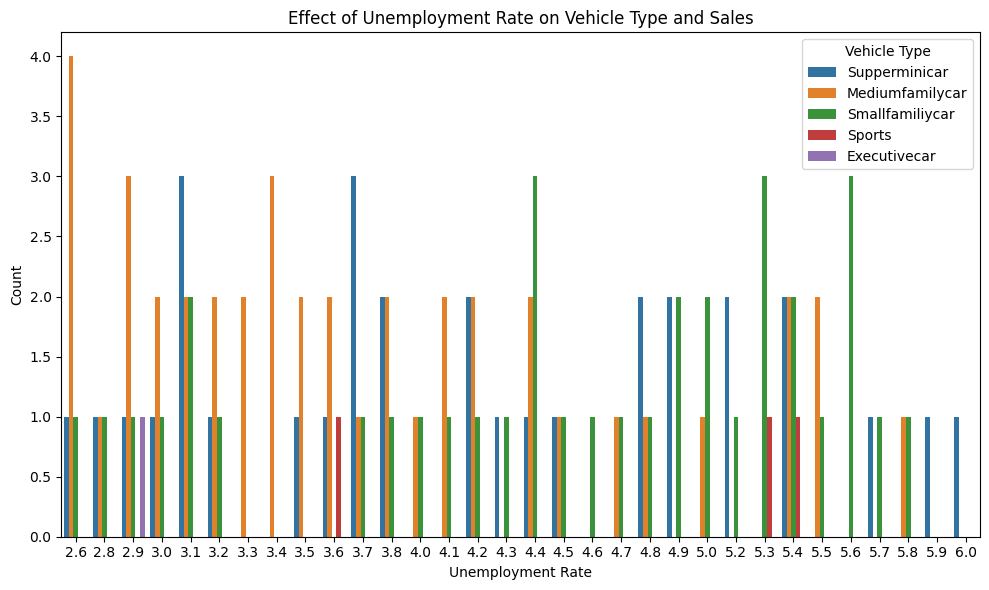

In [33]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter data for recession periods
data = df[df['Recession'] == 1]

# Create countplot to analyze effect of unemployment rate on vehicle type and sales
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')

plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(title='Vehicle Type', loc='upper right')

plt.tight_layout()
plt.show()



                                                        Image 12

During the recession, buying patterns have changed

---


In [9]:
df = pd.read_csv('us-states.csv')

showing the recession's impact on various offices/city sales by creating a map


In [37]:

recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1



                                                        Image 13